Standard Template for all Models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/ML Lab/Iris.csv'  # Updated file path
df = pd.read_csv(file_path)

# Now you can use .head()
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Evaluating Linear Regression...
RMSE: 0.26
R-squared: 0.90
------------------------------
Evaluating Logistic Regression...
Accuracy: 0.97
Confusion Matrix:
 [[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



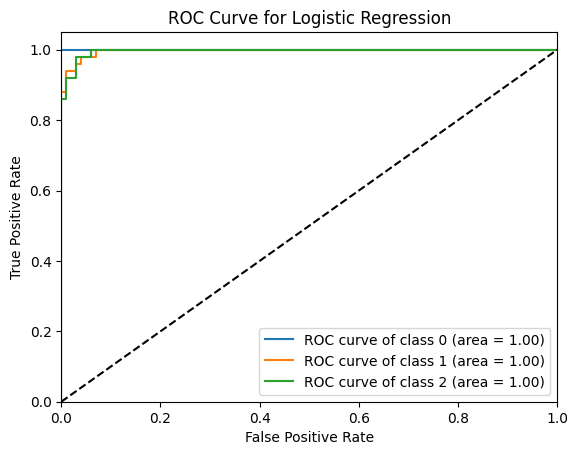

------------------------------
Evaluating SVM...
Accuracy: 0.98
Confusion Matrix:
 [[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



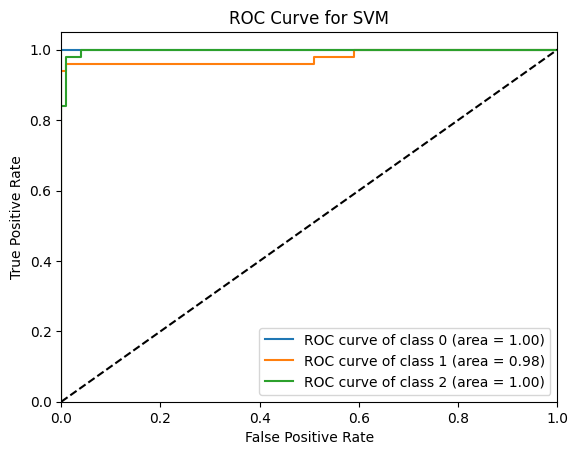

------------------------------
Evaluating Decision Tree...
Accuracy: 0.94
Confusion Matrix:
 [[50  0  0]
 [ 0 44  6]
 [ 0  3 47]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.88      0.91        50
           2       0.89      0.94      0.91        50

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



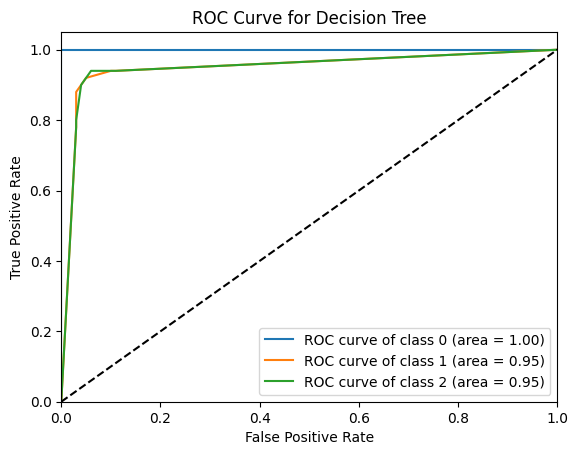

------------------------------


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X, y are already defined (features and target variable)

# Define the classifiers and regressor
models = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(max_iter=120),
    "SVM": SVC(kernel='linear', probability=True),  # Enable probability for ROC
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", random_state=100, min_samples_leaf=5),
}

# Perform cross-validation and evaluation for each model
for name, model in models.items():
    print(f"Evaluating {name}...")

    if name == "Linear Regression":
        # Regression metrics
        y_pred = cross_val_predict(model, X, y, cv=5)  # Get predictions using cross-validation
        rmse = np.sqrt(mean_squared_error(y, y_pred)) # Calculate Root Mean Squared Error (RMSE)
        r2 = r2_score(y, y_pred)  # Calculate R-squared (coefficient of determination)

        print(f"RMSE: {rmse:.2f}") # Print RMSE
        print(f"R-squared: {r2:.2f}") # Print R-squared
    else:
        # Classification metrics
        y_pred = cross_val_predict(model, X, y, cv=5)
        accuracy = accuracy_score(y, y_pred)
        conf_matrix = confusion_matrix(y, y_pred)
        class_report = classification_report(y, y_pred)

        print(f"Accuracy: {accuracy:.2f}")
        print("Confusion Matrix:\n", conf_matrix)
        print("Classification Report:\n", class_report)

        # ROC and AUC (multi-class OvR)
        y_bin = label_binarize(y, classes=np.unique(y))
        n_classes = y_bin.shape[1]

        # Use predict_proba for DecisionTreeClassifier and LogisticRegression
        if name in ["Decision Tree", "Logistic Regression"]:
            y_score = cross_val_predict(model, X, y, cv=5, method="predict_proba")
        else: # Use decision_function for SVM
            y_score = cross_val_predict(model, X, y, cv=5, method="decision_function")

        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curves
        plt.figure()
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {name}')
        plt.legend(loc="lower right")
        plt.show()

    print("-" * 30)

Evaluating Linear Regression...
RMSE: 0.26
MAE: 0.21
R-squared: 0.90
------------------------------
Evaluating Logistic Regression...
Accuracy: 0.97
Confusion Matrix:
 [[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



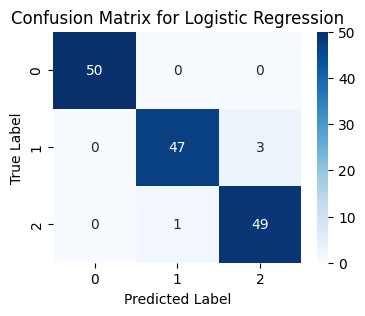

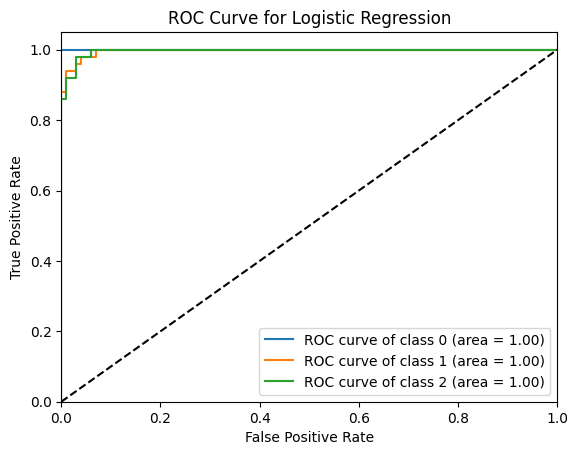

------------------------------
Evaluating SVM...
Accuracy: 0.98
Confusion Matrix:
 [[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



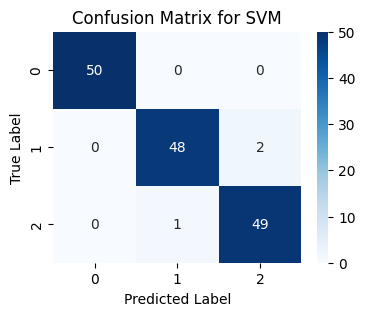

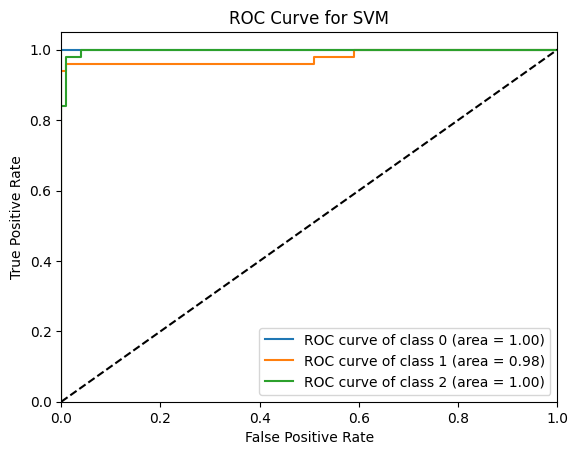

------------------------------
Evaluating Decision Tree...
Accuracy: 0.94
Confusion Matrix:
 [[50  0  0]
 [ 0 44  6]
 [ 0  3 47]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.88      0.91        50
           2       0.89      0.94      0.91        50

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



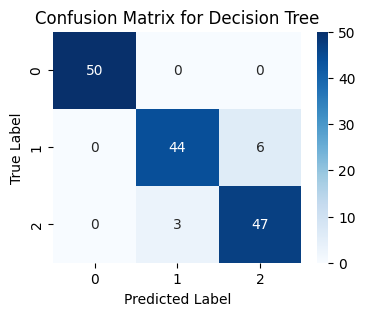

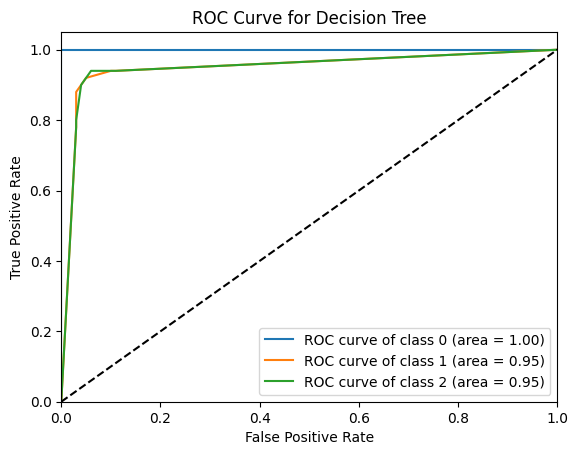

------------------------------


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X, y are already defined (features and target variable)

# Define the classifiers and regressor
models = {
     "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(max_iter=120),
    "SVM": SVC(kernel='linear', probability=True),  # Enable probability for ROC
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", random_state=100, min_samples_leaf=5),

}

# Perform cross-validation and evaluation for each model
for name, model in models.items():
    print(f"Evaluating {name}...")

    if name == "Linear Regression":
        # Regression metrics
        y_pred = cross_val_predict(model, X, y, cv=5)  # Get predictions using cross-validation

        # Calculate and print regression metrics
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)

        print(f"RMSE: {rmse:.2f}")
        print(f"MAE: {mae:.2f}")
        print(f"R-squared: {r2:.2f}")
    else:
        # Classification metrics
        # This block needs to be indented
        y_pred = cross_val_predict(model, X, y, cv=5)
        accuracy = accuracy_score(y, y_pred)
        conf_matrix = confusion_matrix(y, y_pred)
        class_report = classification_report(y, y_pred)

        print(f"Accuracy: {accuracy:.2f}")
        print("Confusion Matrix:\n", conf_matrix)
        print("Classification Report:\n", class_report)

        # Visualize confusion matrix using heatmap
        plt.figure(figsize=(4, 3))  # Adjust figure size if needed
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                    xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title(f"Confusion Matrix for {name}")
        plt.show()

        # ROC and AUC (multi-class OvR)
        y_bin = label_binarize(y, classes=np.unique(y))
        n_classes = y_bin.shape[1]

        # Use predict_proba for DecisionTreeClassifier and LogisticRegression
        if name in ["Decision Tree", "Logistic Regression"]:
            y_score = cross_val_predict(model, X, y, cv=5, method="predict_proba")
        else: # Use decision_function for SVM
            y_score = cross_val_predict(model, X, y, cv=5, method="decision_function")

        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curves
        plt.figure()
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {name}')
        plt.legend(loc="lower right")
        plt.show()

    print("-" * 30)

